In [1]:
import numpy as np
import pandas as pd


from scipy.stats import norm
from scipy.io import loadmat

from scipy.optimize import leastsq
from scipy.optimize import least_squares
from scipy.io import loadmat
from scipy.interpolate import interp1d
from scipy.stats import norm
import multiprocessing as mp
from scipy.fft import fft, ifft, fftshift,ifftshift
from scipy.signal import fftconvolve

import matplotlib

from scipy.signal import sosfilt, butter

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
import matplotlib.pyplot as plt
%matplotlib widget

In [3]:
from vagusNerve.utils import *
from vagusNerve.runSim import *
from vagusNerve.phiShape import *
from vagusNerve.phiWeight import *
from vagusNerve.nerveSetup import *
from vagusNerve.recruitment import *

# Setup

In [4]:
time = getTime()
currents = np.arange(100,510,100) # Stimulus amplitudes
tIndex = np.intersect1d(np.where(time*1e3>2),np.where(time*1e3<10))

d = getDiameters() 

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2365393/ipykernel_221970/1963819508.py:3: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  tIndex = np.intersect1d(np.where(time*1e3>2),np.where(time*1e3<10))


# Neural data figure

## Fiber velocities

### Myelinated

In [5]:
def getVelocitiesM(diameter,t1,t2,s1,s2):
    
    internodeDistance = 100 * diameter # in um
    
    numSections = s2-s1
    
    time = t2-t1 # in ms
    
    distance = (1 + internodeDistance) * numSections * 1e-6 # in m. Add 1 to account for node length
    
    v = distance / (time * 1e-3) # in m/s
    
    return v

In [6]:
v20 = getVelocitiesM(20,1.005,1.2275,42,52)
v10 = getVelocitiesM(10,0.9825,1.20625,42,52)
v5 = getVelocitiesM(5,0.9475,1.165,42,52)
v2 = getVelocitiesM(2,0.8725,1.0775,42,52)

diamsM = np.array([0,2,5,10,20])
vM = np.array([0,v2,v5,v10,v20])

### Unmyelinated

In [7]:
def getVelocitiesU(t1,t2,s1,s2):
    
    sectionLength = 50 # in um
    
    numSections = s2-s1
    
    time = t2-t1 # in ms
    
    distance = sectionLength * numSections * 1e-6 # in m
    
    v = distance / (time * 1e-3) # in m/s
    
    return v

In [8]:
vp8 = getVelocitiesU(10.1125,11.3,85,95)
vp4 = getVelocitiesU(14.755,16.5175,85,95)
vp2 = getVelocitiesU(22.387501,25.0625,85,95)
vp3 = getVelocitiesU(17.455,19.537498,85,95)
vp6 = getVelocitiesU(11.7975,13.1925,85,95)

diamsU = np.array([0,0.2,0.3,0.4,0.6,0.8])
vU = np.array([0,vp2,vp3,vp4,vp6,vp8])

## AP shape

### Myelinated

In [9]:
ap = pd.read_excel('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/APShape20.xlsx') # Rat

ap2 = pd.read_excel('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/APShape10.xlsx') # Rat

fitap = FitAPShape(ap,time)
fitap2 = FitAPShape(ap2,time)


### Unmyelinated

In [ ]:
apU = pd.read_excel('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/APShapePoint8.xlsx') # Rat

apU2 = pd.read_excel('/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/APShapePoint4.xlsx') # Rat

fitapU = FitAPShape(apU,time)
fitapU2 = FitAPShape(apU2,time)


## Thresholds

### Myelinated

In [ ]:
thresholds = np.array([8.0625,3.40625,2.23438,1.71875,1.45313,1.28906,1.17188,1.03906,0.945313])
diameters = np.array([1,2,3,4,5,6,7,8,9])

thresholds *= 178


### Unmyelinated

In [12]:
thresholdsU = np.array([552,280,189,143,116,97,84,74,66.5])
diametersU = np.array([1,2,3,4,5,6,7,8,9])*0.1

thresholdsU *= 178


## Plots everything

/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2365393/ipykernel_221313/3333821911.py:28: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(time*1e3, fitap*1e3)
/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2365393/ipykernel_221313/3333821911.py:29: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(time*1e3, fitap2*1e3)
/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2365393/ipykernel_221313/3333821911.py:40: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(time*1e3, fitapU*1e3)
/gpfs/bbp.cscs.ch/ssd/slurmTmpFS/tharayil/2365393/ipykernel_221313/3333821911.py:41: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(time*1e

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/bbp.cscs.ch/project/proj85/vagusPublication/notebooks/figures/dataFigure.png'

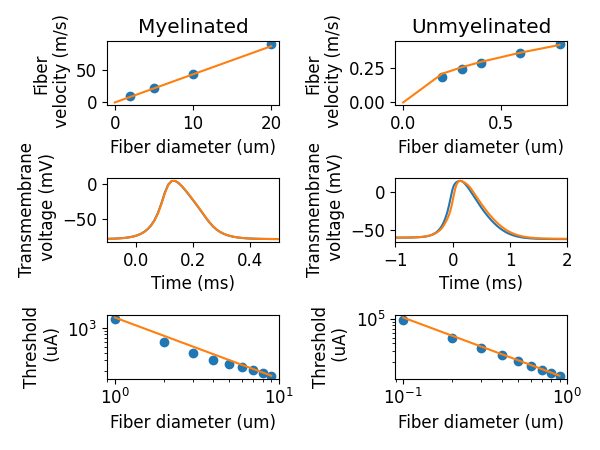

In [13]:
plt.figure(figsize=(6,4.5))

plt.subplot(3,2,1) # velocity, myelinated

plt.title('Myelinated')

plt.plot(diamsM[1:],vM[1:],'o')
plt.plot(diamsM,86.95*diamsM/20)
plt.xlabel('Fiber diameter (um)')
plt.ylabel('Fiber\n velocity (m/s)')

plt.tight_layout()

plt.subplot(3,2,2) # Velocity, unmyelinated

plt.title('Unmyelinated')

plt.plot(diamsU[1:],vU[1:],'o')
plt.plot(diamsU,0.416*np.sqrt(diamsU/0.8))
plt.xlabel('Fiber diameter (um)')
plt.ylabel('Fiber\n velocity (m/s)')


plt.tight_layout()

plt.subplot(3,2,3) # AP shape, myelinated

plt.plot(time*1e3, fitap*1e3)
plt.plot(time*1e3, fitap2*1e3)

plt.xlabel('Time (ms)')
plt.ylabel('Transmembrane\n voltage (mV)')

plt.xlim([-.1,.5])

plt.tight_layout()

plt.subplot(3,2,4) # AP shape, unmyelinated

plt.plot(time*1e3, fitapU*1e3)
plt.plot(time*1e3, fitapU2*1e3)

plt.xlabel('Time (ms)')
plt.ylabel('Transmembrane\n voltage (mV)')

plt.xlim([-1,2])

plt.tight_layout()

plt.subplot(3,2,5) # Threshold, myelinated

plt.loglog(diameters,thresholds,'o')
plt.loglog(diameters,thresholds[-1]*diameters[-1]/diameters)

plt.xlabel('Fiber diameter (um)')
plt.ylabel('Threshold\n (uA)')

plt.tight_layout()

plt.subplot(3,2,6) # Threshold, unmyelinated

plt.loglog(diametersU,thresholdsU,'o')
plt.loglog(diametersU,thresholdsU[-1]*diametersU[-1]/diametersU)

plt.xlabel('Fiber diameter (um)')
plt.ylabel('Threshold\n (uA)')

plt.tight_layout()

plt.savefig('figures/dataFigure.png',dpi=600)


# Loads signals from default configuration

### Horizontal electrode, high perineuria conductivity, large separation between recording electrodes, 6 cm from stimulus to recording electrode

In [14]:
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic'

distanceIdx = 0 # 6 cm

maffAll = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    maffAll = np.vstack((maffAll,np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))
    
meffAll = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    meffAll = np.vstack((meffAll,np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

uaffAll = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    uaffAll = np.vstack((uaffAll,np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals_'+str(i)+'.npy')[np.newaxis]))

ueffAll = np.load(outputfolder+'/ueff/'+str(0)+'/signals_0.npy')[np.newaxis]

for i in np.arange(1,39):
    ueffAll = np.vstack((ueffAll,np.load(outputfolder+'/ueff/'+str(0)+'/signals_'+str(i)+'.npy')[np.newaxis]))

totalAll = maffAll + meffAll+ uaffAll + ueffAll



KeyboardInterrupt: 

In [ ]:
signals = np.sum(totalAll,axis=0)

In [ ]:
recruitment = []
for i in range(39):
    recruitment.append(np.load(outputfolder+'/recruitment/recruitment_'+str(i)+'.npy',allow_pickle=True))
    

# Correlations between different fascicles
### Same recording parameters as above
### 500 uA stimulus current

In [ ]:
from sklearn.cluster import SpectralCoclustering 

In [ ]:
normalizedSignals = totalAll[:,-1,tIndex]/np.mean(np.sqrt(totalAll[:,-1,tIndex]**2),axis=0)


In [ ]:
correlations = np.corrcoef(normalizedSignals)


In [ ]:
nclusters = 3

In [ ]:
model = SpectralCoclustering(n_clusters=nclusters, random_state=0)
model.fit(correlations)

In [ ]:
fit_data = correlations[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

### RGB values based on cluster for each fascicle

In [ ]:
rgbs = []

rgbList = [np.array([31,119,180])/255,np.array([255,127,14])/255,np.array([44,160,44])/255,np.array([214,39,40])/255]

for label in model.row_labels_:

    rgbs.append(rgbList[label])

np.save('figures/clusterRGB.npy',rgbs)

    

## Correlations sorted by cluster
## Signals from each fascicle and recruitment curves, colored by cluster

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,3),constrained_layout=True)

gs = GridSpec(2,2,figure=fig)

ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])

plot = ax0.imshow(fit_data, cmap=plt.cm.bwr,vmin=-1,vmax=1,interpolation='None')
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# plt.xticks(np.arange(39),np.argsort(model.row_labels_))
# plt.yticks(np.arange(39),np.argsort(model.row_labels_))

# fig.colorbar(plot, label='Correlation',location='right',fraction=0.05)
# plt.xlabel('Fascicle Index')
# plt.ylabel('Fascicle Index')

for i in range(39):

    ax1.plot(d*1e6,recruitment[i][-1][0],c='C'+str(model.row_labels_[i]))
    
    ax1.set_xlabel('Fiber Diameter ($\mu$m)')
    ax1.set_ylabel('Recruitment\n fraction')
    
    
    ax2.plot(time[1:-1]*1e3,totalAll[i,-1],c='C'+str(model.row_labels_[i]),alpha=0.5)

    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('eCAP (V)')

    ax2.set_xlim([1,8])

for i in np.unique(model.row_labels_):

    meanSignal = np.sum(totalAll[model.row_labels_==i,-1],axis=0)

    ax2.plot(time[1:-1]*1e3,meanSignal,c='C'+str(i))
    

plt.savefig('figures/correlations.png',dpi=600)

## Same as above, but with colorbar

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,3),constrained_layout=True)

gs = GridSpec(2,2,figure=fig)

ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])

plot = ax0.imshow(fit_data, cmap=plt.cm.bwr,vmin=-1,vmax=1,interpolation='None')
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# plt.xticks(np.arange(39),np.argsort(model.row_labels_))
# plt.yticks(np.arange(39),np.argsort(model.row_labels_))

fig.colorbar(plot, label='Correlation',location='right',fraction=0.05)
# plt.xlabel('Fascicle Index')
# plt.ylabel('Fascicle Index')

for i in range(39):

    ax1.plot(d*1e6,recruitment[i][-1][0],c='C'+str(model.row_labels_[i]))
    
    ax1.set_xlabel('Fiber Diameter ($\mu$m)')
    ax1.set_ylabel('Recruitment\n fraction')
    
    
    ax2.plot(time[1:-1]*1e3,totalAll[i,-1],c='C'+str(model.row_labels_[i]))

    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('eCAP (V)')

    ax2.set_xlim([1,8])
    

plt.savefig('figures/correlations_colorbar.png',dpi=600)

# Examples

In [ ]:
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic'

dist = []
for i in range(39):
    dist.append(np.load(outputfolder+'/fascicles/probDist'+str(i)+'.npy',allow_pickle=True))
    

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6.5,4.5),constrained_layout=True)

gs = GridSpec(3,6,figure=fig)

ax0 = fig.add_subplot(gs[0,:3])
ax1 = fig.add_subplot(gs[0,3:])
ax2 = fig.add_subplot(gs[1,:3])

ax3 = fig.add_subplot(gs[1,3:])
ax4 = fig.add_subplot(gs[2,:3])

ax5 = fig.add_subplot(gs[2,3:])

selections = [0,1,35]

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic'

for i in selections:
    
    ax0.plot(d*1e6,recruitment[i][-1][0],c='C'+str(model.row_labels_[i]))

    ax0.set_xlabel('Fiber Diameter ($\mu$m)')
    ax0.set_ylabel('Recruitment\n fraction')

    ax1.plot(d*1e6,dist[i][0],c='C'+str(model.row_labels_[i]))
    # ax1.set_xlim([0,10])
    ax1.ticklabel_format(axis='y',scilimits=[0,0])
    ax1.set_xlabel('Fiber Diameter ($\mu$m)')
    ax1.set_ylabel('Probability')

    scaling = np.load(outputfolder+'/diameters/scaling_'+str(i)+'.npy')

    ax2.plot(d*1e6,scaling[0],c='C'+str(model.row_labels_[i]))
    # ax2.set_xlim([0,10])
    ax2.set_xlabel('Fiber Diameter ($\mu$m)')
    ax2.set_ylabel('$\eta_v$ ($ s^2 / \Omega$ )')

    scaling = np.load(outputfolder+'/maff/scaling_'+str(i)+'.npy',allow_pickle=True)

    ax3.plot(d*1e6,scaling[:,-1],c='C'+str(model.row_labels_[i]))
    # ax3.set_xlim([0,10])
    ax3.set_xlabel('diameter ($\mu$m)')
    ax3.set_ylabel('Scaling\n factor ($ s^2 \Omega $)')

    phi = np.load(outputfolder+'/phis/0/'+str(i)+'.npy',allow_pickle=True)

    ax4.plot(time*1e3,phi[0,:,-1],c='C'+str(model.row_labels_[i]))
    ax4.set_xlim([1,8])
    ax4.set_xlabel('Time (ms)')
    ax4.set_ylabel('Exposure\n Function\n ( $ V s^2/\Omega $ )')
        
    ax5.plot(time[1:-1]*1e3,maffAll[i,-1],c='C'+str(model.row_labels_[i]))
    ax5.set_xlabel('Time (ms)')
    ax5.set_ylabel('eCAP (V)')
    ax5.set_xlim([1,8])

plt.tight_layout()
plt.savefig('figures/example.png',dpi=600)
    

In [ ]:

velocityList = getVelocities(d) # Gets velocity for each diameter


## Plots them all on seperate figures:

In [ ]:
from matplotlib.gridspec import GridSpec

selections = [0,1,35]

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic'

plt.figure(figsize=(2.5,2))

for i in selections:

    ax = plt.gca()
    
    ax.plot(d*1e6,recruitment[i][-1][0],c='C'+str(model.row_labels_[i]))

ax.set_xlabel('Fiber Diameter ($\mu$m)')
ax.set_ylabel('Recruitment\n fraction')

plt.tight_layout()

plt.savefig('figures/example/recruitment.png',dpi=600)

plt.figure(figsize=(2.5,2))

for i in selections:
    
    ax1 = plt.gca() 

    ax1.plot(d*1e6,dist[i][0],c='C'+str(model.row_labels_[i]))
    # ax1.set_xlim([0,10])
ax1.ticklabel_format(axis='y',scilimits=[0,0])
ax1.set_xlabel('Fiber Diameter ($\mu$m)')
ax1.set_ylabel('Probability')
plt.tight_layout()

plt.savefig('figures/example/probability.png',dpi=600)

plt.figure(figsize=(2.5,2))

for i in selections:

    ax2 = plt.gca()

    scaling = np.load(outputfolder+'/0/diameters/scaling_'+str(i)+'.npy')

    ax2.plot(d*1e6,scaling[0],c='C'+str(model.row_labels_[i]))
    # ax2.set_xlim([0,10])
ax2.set_xlabel('Fiber Diameter ($\mu$m)')
ax2.set_ylabel('$\eta_v$ ($ s^2 / \Omega$ )')
plt.tight_layout()
plt.savefig('figures/example/currentscaling.png',dpi=600)

plt.figure(figsize=(2.5,2))

for i in selections:

    ax3 = plt.gca()

    scaling = np.load(outputfolder+'/0/maff/0/scaling_'+str(i)+'.npy',allow_pickle=True)

    ax3.plot(d*1e6,scaling[:,-1],c='C'+str(model.row_labels_[i]))
    # ax3.set_xlim([0,10])
ax3.set_xlabel('diameter ($\mu$m)')
ax3.set_ylabel('Scaling\n factor ($ s^2 / \Omega $)')
plt.tight_layout()

plt.savefig('figures/example/totalScaling.png',dpi=600)

plt.figure(figsize=(2.5,2))

for i in selections:

    ax4 = plt.gca()

    phi = np.load(outputfolder+'/0/phis/0/'+str(i)+'.npy',allow_pickle=True)

    ax4.plot(time*1e3,phi[0,:,-1] / 509e-6,c='C'+str(model.row_labels_[i]))
ax4.set_xlim([1,8])
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('Exposure\n Function\n ( $s^2$ )')

plt.tight_layout()

plt.savefig('figures/example/exposure.png',dpi=600)

plt.figure(figsize=(2.5,2))

for i in selections:

    ax5 = plt.gca()
        
    ax5.plot(time[1:-1]*1e3,maffAll[i,-1],c='C'+str(model.row_labels_[i]))
ax5.set_xlabel('Time (ms)')
ax5.set_ylabel('eCAP (V)')
ax5.set_xlim([1,8])

plt.tight_layout()

for i in selections:

    ax5 = plt.gca()

    phiFunc = FitPhiShape(i,0.06)# Defines an interpolation function for the recording exposure for the fasicle

    phiShape0 = PhiShape(velocityList[0],time,phiFunc)

    selectedDiameters = [3e-6,3.1e-6]

    for diam in selectedDiameters:

        diamIdx = np.argmin(np.abs(d-diam))
        phi = phiShape0[diamIdx] / 509e-6
        
        ax5.plot(time*1e3,phi,c='C'+str(model.row_labels_[i]))


ax5.set_xlabel('Time (ms)')
ax5.set_ylabel('Sensitivity (V/A)')
ax5.set_xlim([4,5.6])

plt.savefig('figures/example/phi.png',dpi=600)

plt.tight_layout()

plt.savefig('figures/example/cap.png',dpi=600)

plt.figure(figsize=(2.5,2))

ax = plt.gca()

V = fitap

der = np.diff(V,n=2)/((time[1]-time[0])**2) # Second derivative of action potential shape

plt.plot(time[1:-1]*1e3,der,'k')
ax.set_xlabel('Time (ms)')
ax.set_xlim([-.1,.5])
ax.set_ylabel('Second derivative\n of action potential\n (V/$s^2$)')

plt.tight_layout()

plt.savefig('figures/example/derivtaive.png',dpi=600)


# Gaussian jitter in recruitment curve
### Random variable added to the recruitment threshold for each fiber in the S4L model, with mean 10% to 40% of the threshold
### 500 uA current applied
### 6 cm distance between stimulus and recording electrodes

In [ ]:
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_gaussian/'

distanceIdx = 0

maff6cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

total6cm = maff6cm + meff6cm + uaff6cm + ueff6cm

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,4.5),constrained_layout=True)

gs = GridSpec(3,6,figure=fig)
ax0 = fig.add_subplot(gs[0,:3])
ax1 = fig.add_subplot(gs[0,3:])
ax2 = fig.add_subplot(gs[1,:3])
ax3 = fig.add_subplot(gs[1,3:])
ax4 = fig.add_subplot(gs[2,2:5])

axes = [ax0,ax1,ax2,ax3,ax4]

legend = []

jitters = np.linspace(10,40,4)

for i in range(4):

    axes[i].plot(time[1:-1]*1e3,total6cm[i],c='tab:purple')
    
    # axes[i].set_title(str(jitters[i]) +'% jitter')
    axes[i].set_xlim([1,8])
    if i%2 == 0:
        axes[i].set_ylabel('eCAP (V)')
    if int(i/2)==1:
        axes[i].set_xlabel('Time (ms)')
    
    
ax4.plot(time[1:-1]*1e3,signals[-1],c='tab:purple')

# ax4.set_title('Reference Signal')
    
ax4.set_xlabel('Time (ms)')
ax4.set_ylabel('eCAP (V)')

ax4.set_xlim([1,8])

plt.savefig('figures/gaussian.png',dpi=600)

# Small cuff electrode covering only one side of the nerve
### 6 cm distance between stimulus and recording electrodes
### 12 mm separation between stimulus and recordign electrodes
### No gaussian jitter
### Signal plotted at 500 uA for both reference case and small electrode case

# Saves sensitivity magnitude for each fascicle as an RGB value

In [ ]:
import matplotlib as mpl

CuffList = ['/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity_Bipolar_Corrected/',
           '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity_Small_20240213/',
           '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity_Small_Otherside_20240215/']


cmap = mpl.cm.ScalarMappable(cmap=mpl.colormaps['viridis'])

amps = []

recordingCurrents = [509e-6,250e-6,273e-6]

In [ ]:


for i, c in enumerate(CuffList):
    for fascIdx in range(39):
        phi = pd.read_excel(c+str(fascIdx)+'_BetterConductivity.xlsx') 
        amp = np.max(phi.iloc[:,1])-np.min(phi.iloc[:,1])
        amps.append(amp/recordingCurrents[i])
        
rgb = cmap.to_rgba(amps)

np.save('figures/rgb.npy',rgb)

### plots colorbar

In [ ]:
plt.figure(figsize=(6,2))
sc = plt.scatter(np.arange(39*3),amps,c=amps)
plt.colorbar(sc,label='Sensitivity\nAmplitude (V/A)')
plt.savefig('figures/smallCuffAll_colorbar.png',dpi=600)

# All three electrodes

In [ ]:
from matplotlib.gridspec import GridSpec

recordingCurrents = [250e-6,273e-6,509e-6]

fig = plt.figure(figsize=(6,2),constrained_layout=True)

gs = GridSpec(1,2,figure=fig)

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_smallRec/'

distanceIdx = 0

maff6cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

total6cm = maff6cm + meff6cm + uaff6cm + ueff6cm

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_smallRec_otherside/'

distanceIdx = 0

maff6cm2 = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm2 = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm2 = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm2 = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

total6cm2 = maff6cm2 + meff6cm2 + uaff6cm2 + ueff6cm2

ax =  fig.add_subplot(gs[0,1])

for i in range(1):
    
    ax.plot(time[1:-1]*1e3,total6cm[-1],c='tab:red')
    ax.plot(time[1:-1]*1e3,total6cm2[-1],c='tab:purple')
    ax.plot(time[1:-1]*1e3,signals[-1],c='k')
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('eCAP (V)')
# ax.legend(['Small, left', 'Small, right','Full cuff'],loc='right')
ax.set_xlim([1,8])


CuffList = ['/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity_Small_20240213/',
           '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity_Small_Otherside_20240215/',
           '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/Data/PhiConductivity_Bipolar_Corrected/']



selectedFasc = [1,20,36]

colors = ['tab:red','tab:purple','k']

for i, cuff in enumerate(CuffList):

    if i == 0:
    
        newAx = fig.add_subplot(gs[0,0])
    
    for fascIdx in [selectedFasc[2]]:
        phi = pd.read_excel(cuff+str(fascIdx)+'_BetterConductivity.xlsx') 

        newAx.plot(phi.iloc[:,0], phi.iloc[:,1]/recordingCurrents[i],c=colors[i])

    newAx.set_ylabel('Sensitivity\n (V/A)')

    if i == 2:
        newAx.set_xlabel('Location (m)')

    newAx.set_xlim([0.05,0.15])
    
    
plt.savefig('figures/smallCuffAll.png',dpi=600)

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,2),constrained_layout=True)

gs = GridSpec(1,1,figure=fig)

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_smallRec/'

distanceIdx = 0

maff6cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

total6cm = maff6cm + meff6cm + uaff6cm + ueff6cm

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_smallRec_otherside/'

distanceIdx = 0

maff6cm2 = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm2 = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm2 = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm2 = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

total6cm2 = maff6cm2 + meff6cm2 + uaff6cm2 + ueff6cm2

ax =  fig.add_subplot(gs[0,0])

for i in range(1):
    
    ax.plot(time[1:-1]*1e3,total6cm[-1],c='tab:red')
    ax.plot(time[1:-1]*1e3,total6cm2[-1],c='tab:purple')
    ax.plot(time[1:-1]*1e3,signals[-1],c='k')
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('eCAP (V)')
ax.legend(['Small, left', 'Small, right','Full cuff'],loc='right')
ax.set_xlim([1,8000])


    
plt.savefig('figures/smallCuffAll_legend.png',dpi=600)

# Saves percent myelinated fiber activation for each fascicle as an RGB value

In [ ]:
import matplotlib as mpl

stimList = ['/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/',
           '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_downward/']


cmap = mpl.cm.ScalarMappable(cmap=mpl.colormaps['viridis'])

fractions = []

for s in stimList:
    for fascIdx in np.arange(39):
        
        recruitment = np.load(s+'/'+str(0)+'/recruitment/recruitment_'+str(fascIdx)+'.npy',allow_pickle=True)[-1][0]
        probs = np.load(s+'/'+str(0)+'/fascicles/probDist'+str(fascIdx)+'.npy',allow_pickle=True)
        pcts = np.load(s+'/'+str(0)+'/fascicles/probs'+str(fascIdx)+'.npy',allow_pickle=True)
        
        maff = probs[0]/(pcts[0]+pcts[1])
        meff = probs[1]/(pcts[0]+pcts[1])

        frac = np.sum(maff*recruitment+meff*recruitment)

        fractions.append(frac)
        
        
rgb = cmap.to_rgba(fractions)

np.save('figures/rgb_percentActivation.npy',rgb)

### Makes colorbar

In [ ]:
plt.figure(figsize=(6,2))
sc = plt.scatter(np.arange(2*39),fractions,c=fractions)
plt.colorbar(sc,label='Fraction activated')
    
plt.savefig('figures/verticalVhorizontal_colorbar.png',dpi=600)
plt.show()

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,4.5),constrained_layout=True)

gs = GridSpec(3,2,figure=fig)

outputfolderD = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_downward/'

distanceIdx = 0

maffD = np.load(outputfolderD+'/maff/'+str(distanceIdx)+'/signals.npy')
meffD = np.load(outputfolderD+'/meff/'+str(distanceIdx)+'/signals.npy')
uaffD = np.load(outputfolderD+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueffD = np.load(outputfolderD+'/ueff/'+str(distanceIdx)+'/signals.npy') 

totalD = maffD + meffD + uaffD + ueffD


ax =  fig.add_subplot(gs[2,:])

for i in range(1):
    
    ax.plot(time[1:-1]*1e3,totalD[-1],'tab:red')
    ax.plot(time[1:-1]*1e3,signals[-1],'k')
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('eCAP (V)')
# ax.legend(['Vertical','Horizontal'],loc='right')
ax.set_xlim([1,8])


stimList = ['/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/',
           '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_downward/']



selectedFasc = [1,20,36]

for i, stim in enumerate(stimList):
    
    newAx = fig.add_subplot(gs[i,0])
    
    for fascIdx in selectedFasc:
        recruitment = np.load(stim+'/recruitment/recruitment_'+str(fascIdx)+'.npy',allow_pickle=True)

        newAx.plot(d*1e6,recruitment[-1][0])

    newAx.set_ylabel('Recruitment\n Fraction')

    if i == 1:
        newAx.set_xlabel('Fiber Diameter ($\mu$m)')

    newAx.set_xlim([0,10])
    
    
plt.savefig('figures/verticalVhorizontal.png',dpi=600)

## Same thing with legend

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,4.5),constrained_layout=True)

gs = GridSpec(3,2,figure=fig)

outputfolderD = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_downward/'

distanceIdx = 0

maffD = np.load(outputfolderD+'/maff/'+str(distanceIdx)+'/signals.npy')
meffD = np.load(outputfolderD+'/meff/'+str(distanceIdx)+'/signals.npy')
uaffD = np.load(outputfolderD+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueffD = np.load(outputfolderD+'/ueff/'+str(distanceIdx)+'/signals.npy') 

totalD = maffD + meffD + uaffD + ueffD


ax =  fig.add_subplot(gs[2,:])

for i in range(1):
    
    ax.plot(time[1:-1]*1e3,totalD[-1],'tab:red')
    ax.plot(time[1:-1]*1e3,signals[-1],'k')
    
ax.set_xlabel('Time (ms)')
ax.set_ylabel('eCAP (V)')
ax.legend(['Vertical','Horizontal'],loc='right')
ax.set_xlim([1,8000])


stimList = ['/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/',
           '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_downward/']



selectedFasc = [1,20,36]

for i, stim in enumerate(stimList):
    
    newAx = fig.add_subplot(gs[i,0])
    
    for fascIdx in selectedFasc:
        recruitment = np.load(stim+'/'+str(0)+'/recruitment/recruitment_'+str(fascIdx)+'.npy',allow_pickle=True)

        newAx.plot(d*1e6,recruitment[-1][0])

    newAx.set_ylabel('Recruitment\n Fraction')

    if i == 1:
        newAx.set_xlabel('Fiber Diameter ($\mu$m)')

    newAx.set_xlim([0,10])
    
    
plt.savefig('figures/verticalVhorizontal_legend.png',dpi=600)

In [ ]:
from scipy.io import loadmat



# Compare with in vivo data

In [ ]:
# 6 cm distance between stimulus and recording electrode
### Other parameters unchanged

from scipy.io import loadmat

inVivoData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220303.mat')

a100 = list(inVivoData['eCAPSdata_220328'][0][-1])
a200 = list(inVivoData['eCAPSdata_220328'][0][-2])
a300 = list(inVivoData['eCAPSdata_220328'][0][-3])
a400 = list(inVivoData['eCAPSdata_220328'][0][-4])
a500 = list(inVivoData['eCAPSdata_220328'][0][-5])


outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/'

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,3),constrained_layout=True)

gs = GridSpec(2,2,figure=fig)

distanceIdx = 0

maff6cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 


total6cm = maff6cm + meff6cm + uaff6cm + ueff6cm

legend = []

# ax0 = fig.add_subplot(gs[0,:2])
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
# ax2 = fig.add_subplot(gs[0,2])
# ax4 = fig.add_subplot(gs[0,3])

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
# ax6 = fig.add_subplot(gs[1,2])
# ax8 = fig.add_subplot(gs[1,3])


ax0.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

ax0.plot(a100[2][0],a100[1][-1]-a100[1][0])
ax0.plot(a100[2][0],a200[1][-1]-a200[1][0])
ax0.plot(a100[2][0],a300[1][-1]-a300[1][0])
ax0.plot(a100[2][0],a400[1][-1]-a400[1][0])
ax0.plot(a100[2][0],a500[1][-1]-a500[1][0])

# plt.xlabel('Time (ms)')
ax0.set_ylabel('eCAP (V)')

ax0.set_xlim([1,8])
ax0.set_ylim([-3e-5,3e-5])




for i in np.arange(5):
    
    

    ax1.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    ax1.plot(time[1:-1]*1e3,total6cm[i])
    
    # plt.xlabel('Time (ms)')

    ax1.set_xlim([1,8])
    
    # ax2.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    # ax2.plot(time[1:-1]*1e3,total6cm[i])
    legend.append(str(np.round(currents[i]))+' uA')
    
    # # plt.xlabel('Time (ms)')
    # # plt.ylabel('eCAP (V)')
# ax1.legend(legend,loc='lower right')

    # ax2.set_xlim([10,200])
    # ax2.set_ylim([-5e-6,5e-6])

# 1 cm distance between stimulus and recording electrode
### Other parameters unchanged


distanceIdx = 1

maff1cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff1cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff1cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff1cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

inVivoData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220314.mat')

a100 = list(inVivoData['eCAPSdata_220314'][0][-1])
a200 = list(inVivoData['eCAPSdata_220314'][0][-2])
a300 = list(inVivoData['eCAPSdata_220314'][0][-3])
a400 = list(inVivoData['eCAPSdata_220314'][0][-4])
a500 = list(inVivoData['eCAPSdata_220314'][0][-5])

ax4.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

ax4.plot(a100[2][0],a100[1][-1]-a100[1][0])
ax4.plot(a100[2][0],a200[1][-1]-a200[1][0])
ax4.plot(a100[2][0],a300[1][-1]-a300[1][0])
ax4.plot(a100[2][0],a400[1][-1]-a400[1][0])
ax4.plot(a100[2][0],a500[1][-1]-a500[1][0])

ax4.set_ylabel('eCAP (V)')

ax4.set_xlim([0,20])
ax4.set_ylim([-3e-5,3e-5])

ax4.set_xlabel('Time (ms)')


total1cm = maff1cm + meff1cm + uaff1cm + ueff1cm

for i in np.arange(5):
    
    ax5.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    ax5.plot(time[1:-1]*1e3,total1cm[i])
    
    # ax4.set_xlabel('Time (ms)')
    ax5.set_xlim([0,20])
    

    ax5.set_ylim([-3e-4,3e-4])

    ax5.set_xlabel('Time (ms)')

    
    # ax6.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    # ax6.plot(time[1:-1]*1e3,total1cm[i])
    # legend.append(str(np.round(currents[i]))+' uA')
    
    # # ax5.set_xlabel('Time (ms)')
    # # plt.ylabel('eCAP (V)')
    # # plt.legend(legend)

    # ax6.set_xlim([0,40])
    # ax6.set_ylim([-3e-4,3e-4])

plt.savefig('figures/recordingfig/invivoFig.png',dpi=600)

### Same as above, but with legend

In [ ]:
# 6 cm distance between stimulus and recording electrode
### Other parameters unchanged

from scipy.io import loadmat

inVivoData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220303.mat')

a100 = list(inVivoData['eCAPSdata_220328'][0][-1])
a200 = list(inVivoData['eCAPSdata_220328'][0][-2])
a300 = list(inVivoData['eCAPSdata_220328'][0][-3])
a400 = list(inVivoData['eCAPSdata_220328'][0][-4])
a500 = list(inVivoData['eCAPSdata_220328'][0][-5])


outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/'

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,3),constrained_layout=True)

gs = GridSpec(2,2,figure=fig)

distanceIdx = 0

maff6cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 


total6cm = maff6cm + meff6cm + uaff6cm + ueff6cm

legend = []

# ax0 = fig.add_subplot(gs[0,:2])
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
# ax2 = fig.add_subplot(gs[0,2])
# ax4 = fig.add_subplot(gs[0,3])

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
# ax6 = fig.add_subplot(gs[1,2])
# ax8 = fig.add_subplot(gs[1,3])


ax0.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

ax0.plot(a100[2][0],a100[1][-1]-a100[1][0])
ax0.plot(a100[2][0],a200[1][-1]-a200[1][0])
ax0.plot(a100[2][0],a300[1][-1]-a300[1][0])
ax0.plot(a100[2][0],a400[1][-1]-a400[1][0])
ax0.plot(a100[2][0],a500[1][-1]-a500[1][0])

# plt.xlabel('Time (ms)')
ax0.set_ylabel('eCAP (V)')

ax0.set_xlim([1,8])
ax0.set_ylim([-3e-5,3e-5])




for i in np.arange(5):
    
    

    ax1.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    ax1.plot(time[1:-1]*1e3,total6cm[i])
    
    # plt.xlabel('Time (ms)')

    ax1.set_xlim([1,8])
    
    # ax2.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    # ax2.plot(time[1:-1]*1e3,total6cm[i])
    legend.append(str(np.round(currents[i]))+' uA')
    
    # # plt.xlabel('Time (ms)')
    # # plt.ylabel('eCAP (V)')
ax1.legend(legend,loc='lower right',framealpha=1)

    # ax2.set_xlim([10,200])
    # ax2.set_ylim([-5e-6,5e-6])

# 1 cm distance between stimulus and recording electrode
### Other parameters unchanged


distanceIdx = 1

maff1cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff1cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff1cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff1cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

inVivoData = loadmat('/gpfs/bbp.cscs.ch/project/proj85/vagusNerve/vagusNerveCode/eCAPSdata_220314.mat')

a100 = list(inVivoData['eCAPSdata_220314'][0][-1])
a200 = list(inVivoData['eCAPSdata_220314'][0][-2])
a300 = list(inVivoData['eCAPSdata_220314'][0][-3])
a400 = list(inVivoData['eCAPSdata_220314'][0][-4])
a500 = list(inVivoData['eCAPSdata_220314'][0][-5])

ax4.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

ax4.plot(a100[2][0],a100[1][-1]-a100[1][0])
ax4.plot(a100[2][0],a200[1][-1]-a200[1][0])
ax4.plot(a100[2][0],a300[1][-1]-a300[1][0])
ax4.plot(a100[2][0],a400[1][-1]-a400[1][0])
ax4.plot(a100[2][0],a500[1][-1]-a500[1][0])

ax4.set_ylabel('eCAP (V)')

ax4.set_xlim([0,20])
ax4.set_ylim([-3e-5,3e-5])

ax4.set_xlabel('Time (ms)')


total1cm = maff1cm + meff1cm + uaff1cm + ueff1cm

for i in np.arange(5):
    
    ax5.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    ax5.plot(time[1:-1]*1e3,total1cm[i])
    
    # ax4.set_xlabel('Time (ms)')
    ax5.set_xlim([0,40])
    

    ax5.set_ylim([-3e-4,3e-4])

    ax5.set_xlabel('Time (ms)')

    
    # ax6.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    
    # ax6.plot(time[1:-1]*1e3,total1cm[i])
    # legend.append(str(np.round(currents[i]))+' uA')
    
    # # ax5.set_xlabel('Time (ms)')
    # # plt.ylabel('eCAP (V)')
    # # plt.legend(legend)

    # ax6.set_xlim([0,40])
    # ax6.set_ylim([-3e-4,3e-4])

plt.savefig('figures/recordingfig/invivoFig_legend.png',dpi=600)

# Recording electrode configuration Figure

In [ ]:
# 6 cm distance between stimulus and recording electrode
### Other parameters unchanged

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/'

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,2),constrained_layout=True)

gs = GridSpec(1,2,figure=fig)

distanceIdx = 0

maff1cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff1cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff1cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff1cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 


total1cm = maff1cm + meff1cm + uaff1cm + ueff1cm

legend = ['12 mm','3 mm']


# 3 mm separation between recording electrodes instead of 12 mm
### No gaussian jitter
### 6 cm stimulus-recording separation
    
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_close/'

distanceIdx = 0

maff6cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

total6cm = maff6cm + meff6cm + uaff6cm + ueff6cm

ax0 = fig.add_subplot(gs[0,1])
ax0.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

for i in range(1):

    ax0.plot(time[1:-1]*1e3,signals[-1],c='C2')
    
    ax0.plot(time[1:-1]*1e3,total6cm[-1],c='C3')
    
    
ax0.set_xlabel('Time (ms)')
# ax0.set_ylabel('eCAP (V)')
# ax0.legend(legend,loc='right',handlelength=.5)
ax0.set_xlim([1,8])

# Fascicles plotted in for both distances
### No gaussian jitter
### 6 cm stimulus-recording separation

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/'

outputfolderClose = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_close/'

fascSignals = []


# ax1 = fig.add_subplot(gs[0,3:])

# for fascicle in np.arange(1,2):

#     distanceIdx = 0

#     maff6cm = np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')
#     meff6cm = np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')

#     maff6cmC = np.load(outputfolderClose+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')
#     meff6cmC = np.load(outputfolderClose+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')

#     ax1.plot(time[1:-1]*1e3,maff6cm[-1] + meff6cm[-1],c='b')
#     ax1.plot(time[1:-1]*1e3,maff6cmC[-1] + meff6cmC[-1],c='r')

# ax1.set_xlim([1,8])
# ax1.legend(legend,loc='right',handlelength=.5)
# ax1.set_xlabel('Time (ms)')

# Monopolar recordings
### 12 mm distance between the two cuff electrodes
### No gaussian jitter

outputfolderM = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_monopolar/'

distanceIdx = 0

maffM = np.load(outputfolderM+'/maff/'+str(distanceIdx)+'/signals.npy')
meffM = np.load(outputfolderM+'/meff/'+str(distanceIdx)+'/signals.npy')
uaffM = np.load(outputfolderM+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueffM = np.load(outputfolderM+'/ueff/'+str(distanceIdx)+'/signals.npy') 

totalM = maffM + meffM + uaffM + ueffM

outputfolderMf = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_monopolar_far/'

maffMf = np.load(outputfolderMf+'/maff/'+str(distanceIdx)+'/signals.npy')
meffMf = np.load(outputfolderMf+'/meff/'+str(distanceIdx)+'/signals.npy')
uaffMf = np.load(outputfolderMf+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueffMf = np.load(outputfolderMf+'/ueff/'+str(distanceIdx)+'/signals.npy') 

totalMf = maffMf + meffMf + uaffMf + ueffMf


ax7 = fig.add_subplot(gs[0,0],sharey=ax0)
ax7.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
# legend = ['Proximal monopolar','Distal monopolar','Bipolar']
    
ax7.plot(time[1:-1]*1e3,totalM[-1])
ax7.plot(time[1:-1]*1e3,totalMf[-1])
ax7.plot(time[1:-1]*1e3,signals[-1])
    
ax7.set_xlabel('Time (ms)')
ax7.set_ylabel('eCAP (V)')
# plt.legend(legend,handlelength=.5)

ax7.set_xlim([1,8])



plt.savefig('figures/recordingfig/recordingfig.png',dpi=600)

In [ ]:
# 6 cm distance between stimulus and recording electrode
### Other parameters unchanged

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/'

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6,3),constrained_layout=True)

gs = GridSpec(1,2,figure=fig)

distanceIdx = 0

maff1cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff1cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff1cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff1cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 


total1cm = maff1cm + meff1cm + uaff1cm + ueff1cm

legend = ['12 mm','3 mm']


# 3 mm separation between recording electrodes instead of 12 mm
### No gaussian jitter
### 6 cm stimulus-recording separation
    
outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_close/'

distanceIdx = 0

maff6cm = np.load(outputfolder+'/maff/'+str(distanceIdx)+'/signals.npy')
meff6cm = np.load(outputfolder+'/meff/'+str(distanceIdx)+'/signals.npy')
uaff6cm = np.load(outputfolder+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueff6cm = np.load(outputfolder+'/ueff/'+str(distanceIdx)+'/signals.npy') 

total6cm = maff6cm + meff6cm + uaff6cm + ueff6cm

ax0 = fig.add_subplot(gs[0,1])
ax0.ticklabel_format(style='sci',axis='y',scilimits=(0,0))

for i in range(1):

    ax0.plot(time[1:-1]*1e3,signals[-1],c='C2')
    
    ax0.plot(time[1:-1]*1e3,total6cm[-1],c='C3')
    
    
ax0.set_xlabel('Time (ms)')
ax0.set_ylabel('eCAP (V)')
ax0.legend(legend,loc='right',handlelength=.5)
ax0.set_xlim([1,8000000])

# Fascicles plotted in for both distances
### No gaussian jitter
### 6 cm stimulus-recording separation

outputfolder = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic/'

outputfolderClose = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_close/'

fascSignals = []


# ax1 = fig.add_subplot(gs[0,3:])

# for fascicle in np.arange(1,2):

#     distanceIdx = 0

#     maff6cm = np.load(outputfolder+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')
#     meff6cm = np.load(outputfolder+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')

#     maff6cmC = np.load(outputfolderClose+'/'+str(iteration)+'/maff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')
#     meff6cmC = np.load(outputfolderClose+'/'+str(iteration)+'/meff/'+str(distanceIdx)+'/signals_'+str(fascicle)+'.npy')

#     ax1.plot(time[1:-1]*1e3,maff6cm[-1] + meff6cm[-1],c='b')
#     ax1.plot(time[1:-1]*1e3,maff6cmC[-1] + meff6cmC[-1],c='r')

# ax1.set_xlim([1,8])
# ax1.legend(legend,loc='right',handlelength=.5)
# ax1.set_xlabel('Time (ms)')

# Monopolar recordings
### 12 mm distance between the two cuff electrodes
### No gaussian jitter

outputfolderM = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_monopolar/'

distanceIdx = 0

maffM = np.load(outputfolderM+'/maff/'+str(distanceIdx)+'/signals.npy')
meffM = np.load(outputfolderM+'/meff/'+str(distanceIdx)+'/signals.npy')
uaffM = np.load(outputfolderM+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueffM = np.load(outputfolderM+'/ueff/'+str(distanceIdx)+'/signals.npy') 

totalM = maffM + meffM + uaffM + ueffM

outputfolderMf = '/gpfs/bbp.cscs.ch/project/proj85/scratch/vagusNerve/results/finalResults/Analytic_monopolar_far/'

maffMf = np.load(outputfolderMf+'/maff/'+str(distanceIdx)+'/signals.npy')
meffMf = np.load(outputfolderMf+'/meff/'+str(distanceIdx)+'/signals.npy')
uaffMf = np.load(outputfolderMf+'/uaff/'+str(distanceIdx)+'/signals.npy')
ueffMf = np.load(outputfolderMf+'/ueff/'+str(distanceIdx)+'/signals.npy') 

totalMf = maffMf + meffMf + uaffMf + ueffMf


ax7 = fig.add_subplot(gs[0,0])
ax7.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
legend = ['Proximal monopolar','Distal monopolar','Bipolar']
    
ax7.plot(time[1:-1]*1e3,totalM[-1])
ax7.plot(time[1:-1]*1e3,totalMf[-1])
ax7.plot(time[1:-1]*1e3,totalM[-1]-totalMf[-1])
    
ax7.set_xlabel('Time (ms)')
ax7.set_ylabel('eCAP (V)')
plt.legend(legend,handlelength=.5)

ax7.set_xlim([1,8000000])


plt.savefig('figures/recordingfig/recordingfig_legend.png',dpi=600)